In [1]:
from pandas import read_csv
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)
array = dataframe.values

x = array[: , 0:8]
y = array[: , 8]

In [6]:
# calling kfold method 

num_fold = 10
kfold = KFold(n_splits = num_fold)

In [8]:
model = KNeighborsClassifier(n_neighbors = 14)
results = cross_val_score(model, x, y, cv = kfold)

In [11]:
print(results.mean())

0.7564764183185235


In [ ]:
### Grid Search Algorithm

#### The question is why we have used k = 14 only?

Whenever we are required to tune the hyper parameters in that case we use grid search cross validation algorithm, this GSA will calculate the accuracies and based on the scores of accuracies this GSA will provide us the best kvalue to be choosen, in short whenever we are required to pass hyper parameters for any algorithm we will use GSA

In [16]:
from pandas import read_csv
import numpy as np 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier    

In [17]:
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename,names = names)
array = dataframe.values

x = array[: , 0:8]
y = array[: , 8]

In [22]:
neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = neighbors)

In [23]:
model_grid = KNeighborsClassifier()
grid = GridSearchCV(estimator = model_grid, param_grid = param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [26]:
# Identifying the best score

print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


from this we came to know that best value will be 14

#### Visualizing the CV results

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# for the getting of k between a range of 1 to 40 we will define a range

Text(0, 0.5, 'Cross validated accuracy')

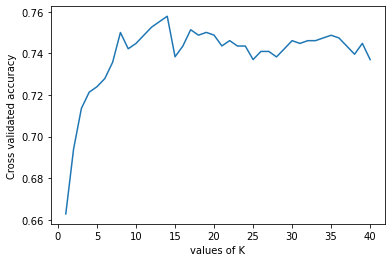

In [31]:
k_range = range(1,41)
# we will create one empty for appending the k scores
k_scores = []
# for iterating through different k values in model we will use for loop and after iterating through each and every value the average accuracy we will be getting as a result

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv = 5)          # By default it will consider 5 number of folds
    k_scores.append(scores.mean())
    
plt.plot(k_range, k_scores)
plt.xlabel("values of K")
plt.ylabel("Cross validated accuracy")